In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Phần 1: EDA (Exploratory Data Analysis)

Bước 1: Đọc dữ liệu và hiển thị cấu trúc

In [ ]:
#Validation dataset
val=pd.read_csv("twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv("twitter_training.csv", header=None)

train = train.head(30000)
train
val.head()
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...




Bước 2: Kiểm tra thông tin dữ liệu



In [ ]:
print(train.shape)
print(val.shape)

(30000, 4)
(1000, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30000 non-null  int64 
 1   1       30000 non-null  object
 2   2       30000 non-null  object
 3   3       29738 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
train.isnull().sum()

0      0
1      0
2      0
3    262
dtype: int64

Bước 3: Thống kê mô tả


In [ ]:
train.describe()

,0
count,30000.000000
mean,5547.983600
std,4418.867275
min,1.000000
25%,1739.750000
50%,4221.500000
75%,9512.250000
max,13200.000000


Bước 4: Phân tích dữ liệu trực quan


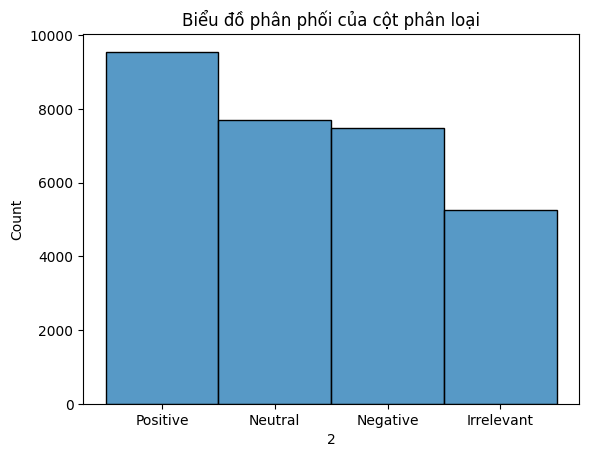

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train[2])
plt.title('Biểu đồ phân phối của cột phân loại')
plt.show()

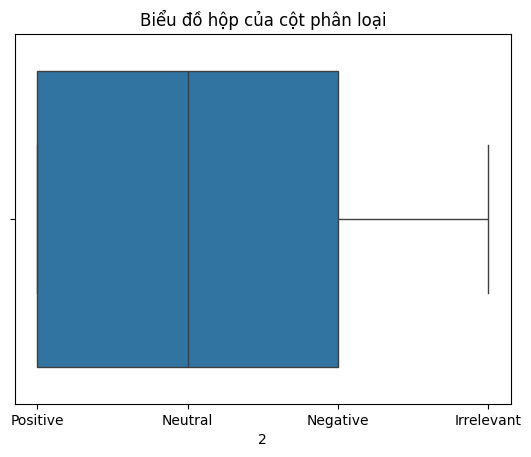

In [ ]:
sns.boxplot(x=train[2])
plt.title('Biểu đồ hộp của cột phân loại')
plt.show()

[link text](https:// [link text](https://))Phần 2: Preprocessing (Tiền xử lý dữ liệu)

> Add blockquote



Bước 1: Đổi tên cột

In [ ]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Bước 2: Xử lý giá trị thiếu


In [ ]:
print(train.isnull().sum())

# Điền giá trị thiếu của cột 'text' bằng giá trị chuỗi rỗng
train['text'] = train['text'].fillna('')

# Xác nhận không còn giá trị thiếu
print(train.isnull().sum())

id               0
information      0
type             0
text           262
dtype: int64
id             0
information    0
type           0
text           0
dtype: int64


Bước 3: Mã hóa biến phân loại


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa các cột phân loại: 'information' và 'type'
label_encoder_info = LabelEncoder()
label_encoder_type = LabelEncoder()

train['information'] = label_encoder_info.fit_transform(train['information'])
train['type'] = label_encoder_type.fit_transform(train['type'])

val['information'] = label_encoder_info.fit_transform(val['information'])
val['type'] = label_encoder_type.fit_transform(val['type'])

In [ ]:
train_data=train
train_data


,id,information,type,text
0,2401,3,3,im getting on borderlands and i will murder yo...
1,2401,3,3,I am coming to the borders and I will kill you...
2,2401,3,3,im getting on borderlands and i will kill you ...
3,2401,3,3,im coming on borderlands and i will murder you...
4,2401,3,3,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
29995,757,1,3,More exciting gameplay from Apex Legends in le...
29996,757,1,3,More exciting game Apex Legends in Rating Mode...
29997,757,1,3,More exciting Apex Legends coming in Ranked ma...
29998,757,1,3,More exciting Apex Legends gameplay in The Ran...


In [ ]:
val_data=val
val_data


,id,information,type,text
0,3364,11,0,I mentioned on Facebook that I was struggling ...
1,352,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,19,1,@Microsoft Why do I pay for WORD when it funct...
3,4371,5,1,"CSGO matchmaking is so full of closet hacking,..."
4,4433,13,2,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,14,0,⭐️ Toronto is the arts and culture capital of ...
996,4359,5,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,4,3,Today sucked so it’s time to drink wine n play...
998,8069,19,3,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [ ]:
train_data.head()

,id,information,type,text,lower
0,2401,3,3,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,3,3,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,3,3,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,3,3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,3,3,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [ ]:
val_data.head()

,id,information,type,text,lower
0,3364,11,0,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,8312,19,1,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,5,1,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,13,2,Now the President is slapping Americans in the...,now the president is slapping americans in the...


Phân chia dữ liệu


In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

Phân tích văn bẳn bằng cách đếm số lượng từ duy nhất trong văn bản đã được làm sạch. điều này giúo ta hiểu đc sự phức tạp của mô hình dữa trên số lượng từ


In [ ]:
import nltk
nltk.download('punkt')

#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of tokens:  16677


In [ ]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [ ]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.classes_ = None
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Chuyển đổi sparse matrix thành dense matrix nếu cần
        if isinstance(X, csr_matrix):
            X = X.toarray()

        # Thêm cột bias vào X
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # Lưu trữ các lớp duy nhất
        self.classes_ = np.unique(y)
        num_classes = len(self.classes_)

        # Khởi tạo ma trận weights cho từng lớp
        self.theta = np.zeros((num_classes, X.shape[1]))

        # One-vs-Rest
        for i, cls in enumerate(self.classes_):
            y_binary = (y == cls).astype(int)
            self.theta[i] = self.gradient_descent(X, y_binary)

        return self

    def gradient_descent(self, X, y):
        # Khởi tạo weights
        weights = np.zeros(X.shape[1])

        # Gradient Descent
        for _ in range(self.num_iterations):
            z = np.dot(X, weights)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / len(y)
            weights -= self.learning_rate * gradient

        return weights

    def predict(self, X):
        if isinstance(X, csr_matrix):
            X = X.toarray()

        X = np.c_[np.ones((X.shape[0], 1)), X]

        scores = X.dot(self.theta.T)  # Tính toán các điểm số cho từng lớp

        # Chọn lớp có điểm số cao nhất là kết quả dự đoán
        predictions = np.argmax(scores, axis=1)

        # Trả về nhãn tương ứng với dự đoán
        return self.classes_[predictions]

Xây dựng model:

1. Bag of word


In [ ]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
X_test_bow

<6000x15746 sparse matrix of type '<class 'numpy.int64'>'
	with 62057 stored elements in Compressed Sparse Row format>

In [ ]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [ ]:
X_train_bow

<24000x15746 sparse matrix of type '<class 'numpy.int64'>'
	with 250713 stored elements in Compressed Sparse Row format>

In [ ]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

type
3    0.316333
2    0.261833
1    0.253000
0    0.168833
Name: count, dtype: float64

In [ ]:

# Logistic regression
model1 = LogisticRegression(learning_rate=0.1, num_iterations=1500)
model1.fit(X_train_bow, y_train_bow)

# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  57.4


In [ ]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [ ]:
X_val_bow

<1000x15746 sparse matrix of type '<class 'numpy.int64'>'
	with 11603 stored elements in Compressed Sparse Row format>

In [ ]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  54.400000000000006


2. tf-idf vectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1) # analysis of one word (unigram)
)

In [ ]:
# Tạo mã hóa TF-IDF cho tập huấn luyện
X_train_tfidf = tfidf_vectorizer.fit_transform(reviews_train.lower)

# Chuyển đổi tập kiểm tra bằng mã hóa TF-IDF đã tạo từ tập huấn luyện
X_test_tfidf = tfidf_vectorizer.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
X_test_tfidf

<6000x15746 sparse matrix of type '<class 'numpy.float64'>'
	with 62057 stored elements in Compressed Sparse Row format>

In [ ]:
y_train_tfidf = reviews_train['type']
y_test_tfidf = reviews_test['type']

In [ ]:
y_test_bow.value_counts() / y_test_bow.shape[0]


type
3    0.316333
2    0.261833
1    0.253000
0    0.168833
Name: count, dtype: float64

In [ ]:
model2 = LogisticRegression(learning_rate=0.1, num_iterations=1500)
model2.fit(X_train_tfidf , y_train_tfidf)
# Prediction
test_pred = model2.predict(X_test_tfidf)
print("Accuracy: ", accuracy_score(y_test_tfidf, test_pred) * 100)

In [ ]:
#Validation data
X_val_tfidf = tfidf_vectorizer.transform(val_data.lower)
y_val_tfidf = val_data['type']

In [ ]:
X_val_tfidf

In [ ]:
Val_res = model2.predict(X_val_tfidf)
print("Accuracy: ", accuracy_score(y_val_tfidf, Val_res) * 100)

3. tf-idf transformer


In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer

count_vect = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1)
)

X_train_counts = count_vect.fit_transform(reviews_train.lower)

# Bước 2: Tạo TfidfTransformer và chuyển đổi BoW thành TF-IDF cho tập huấn luyện
tfidf_transformer = TfidfTransformer()
X_train_tfidf_tf = tfidf_transformer.fit_transform(X_train_counts)

# Chuyển đổi tập kiểm tra bằng CountVectorizer và TfidfTransformer đã tạo từ tập huấn luyện
X_test_counts = count_vect.transform(reviews_test.lower)
X_test_tfidf_tf = tfidf_transformer.transform(X_test_counts)

In [ ]:
X_test_tfidf_tf

In [ ]:
y_train_tfidf_tf = reviews_train['type']
y_test_tfidf_tf = reviews_test['type']

In [ ]:
y_test_tfidf_tf.value_counts() / y_test_tfidf_tf.shape[0]

In [ ]:
model3 = LogisticRegression(learning_rate=0.1, num_iterations=1500)
model3.fit(X_train_tfidf_tf , y_train_tfidf_tf)
# Prediction
test_pred = model3.predict(X_test_tfidf_tf)
print("Accuracy: ", accuracy_score(y_test_tfidf_tf, test_pred) * 100)

In [ ]:
#Validation data
X_val_tfidf_tf = tfidf_vectorizer.transform(val_data.lower)
y_val_tfidf_tf = val_data['type']

In [ ]:
Val_res = model3.predict(X_val_tfidf_tf)
print("Accuracy: ", accuracy_score(y_val_tfidf_tf, Val_res) * 100)